In [1]:
import os
import numpy as np
import csv
import torch
import matplotlib.pyplot as plt
import sys
import cv2


sys.path.append("c:/Users/ADMIN/Desktop/lung")

from torch.utils.data import Dataset, DataLoader
from p2ch13.model import UNetWrapper
from torch.utils.data import Dataset, DataLoader
from scipy.ndimage import center_of_mass, label
from test_dsets import extract_nodule_centers, crop_and_stack, resize_and_stack_images, LungStackedDataset, adjust_brightness_contrast, resize_2d, get_slice_index, resize_and_stack_images_brightness
from vis import visualize_prediction

In [3]:
patients = [1, 2, 3, 4, 5, 6]

for pid in patients:
    mask_dir = f"{pid}/masks"
    csv_path = f"{pid}/nodule_centers.csv"
    extract_nodule_centers(mask_dir, csv_path)

In [4]:
patients = [1, 2, 3, 4, 5, 6]

csv_path = "2/nodule_centers.csv"
img_base_dir = "2/data"
mask_base_dir = "2/masks"
save_img_dir = "resized_imgs"
save_mask_dir = "resized_masks"

resize_and_stack_images(csv_path, img_base_dir, mask_base_dir, save_img_dir, save_mask_dir)

In [5]:
'''
csv_path = "2/nodule_centers.csv"
img_base_dir = "2/data"
mask_base_dir = "2/masks"
save_img_dir = "cropped_imgs"
save_mask_dir = "cropped_masks"

crop_and_stack(csv_path, img_base_dir, mask_base_dir, save_img_dir, save_mask_dir)
'''

'\ncsv_path = "2/nodule_centers.csv"\nimg_base_dir = "2/data"\nmask_base_dir = "2/masks"\nsave_img_dir = "cropped_imgs"\nsave_mask_dir = "cropped_masks"\n\ncrop_and_stack(csv_path, img_base_dir, mask_base_dir, save_img_dir, save_mask_dir)\n'

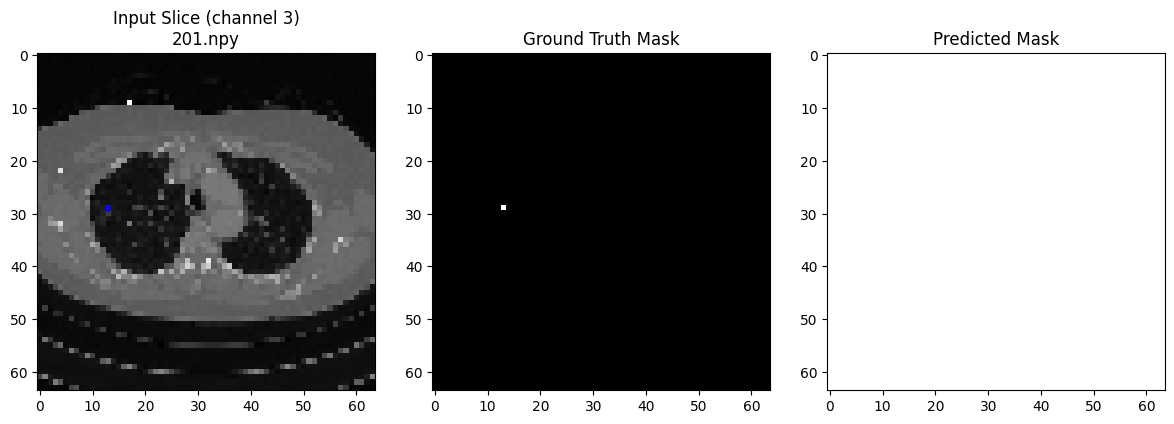

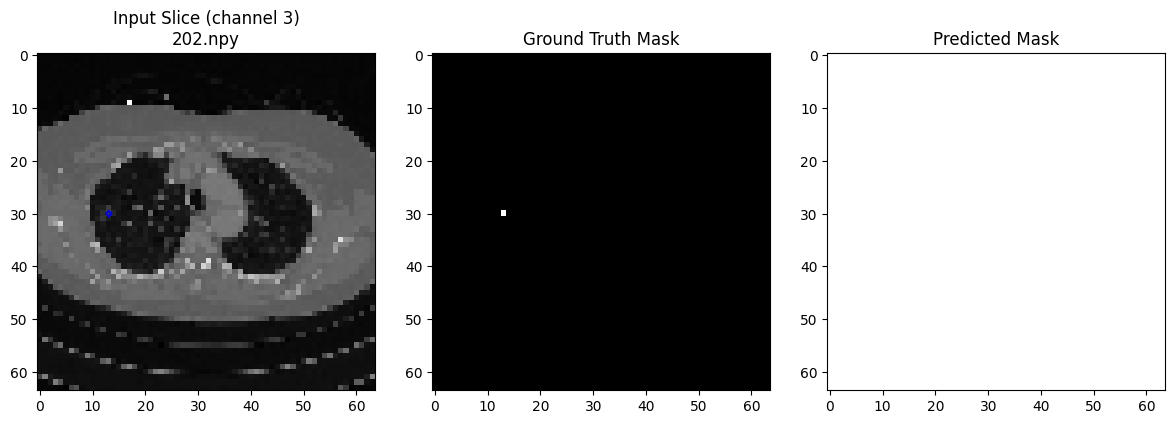

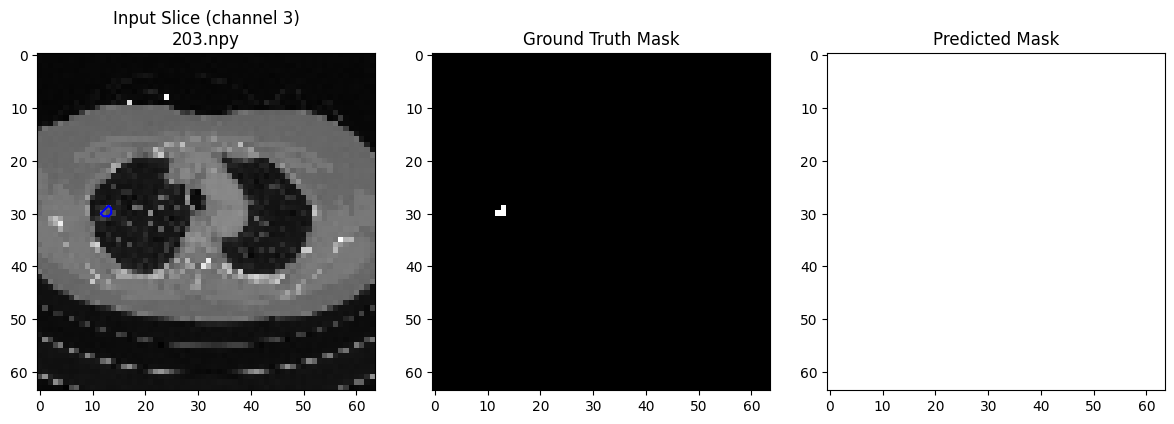

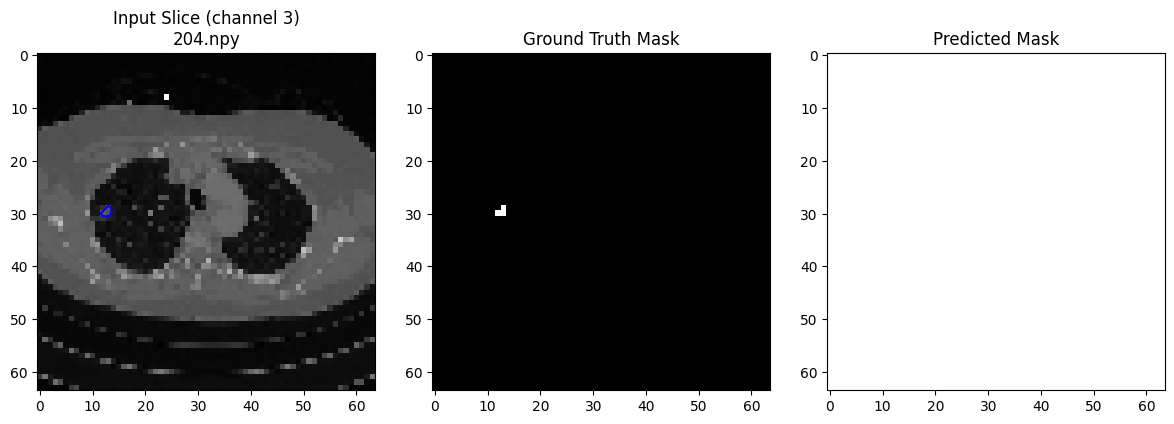

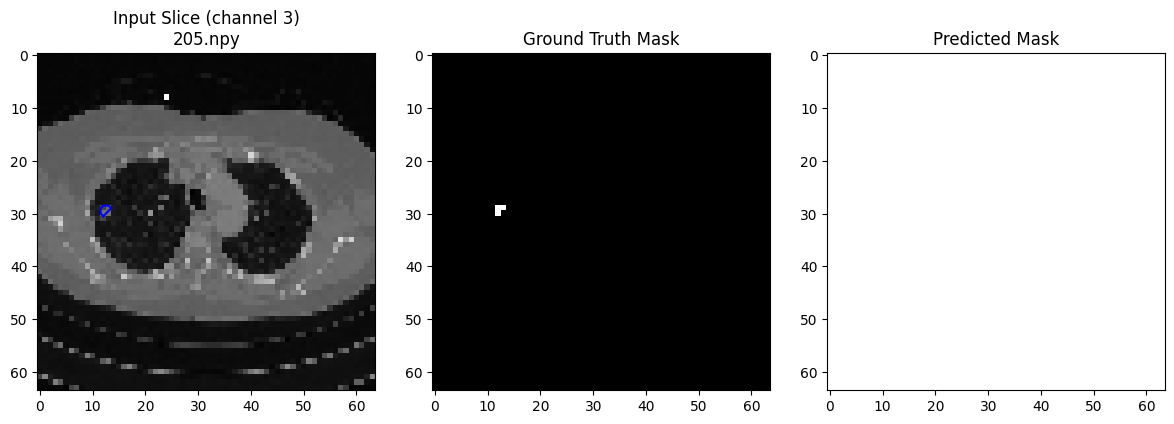

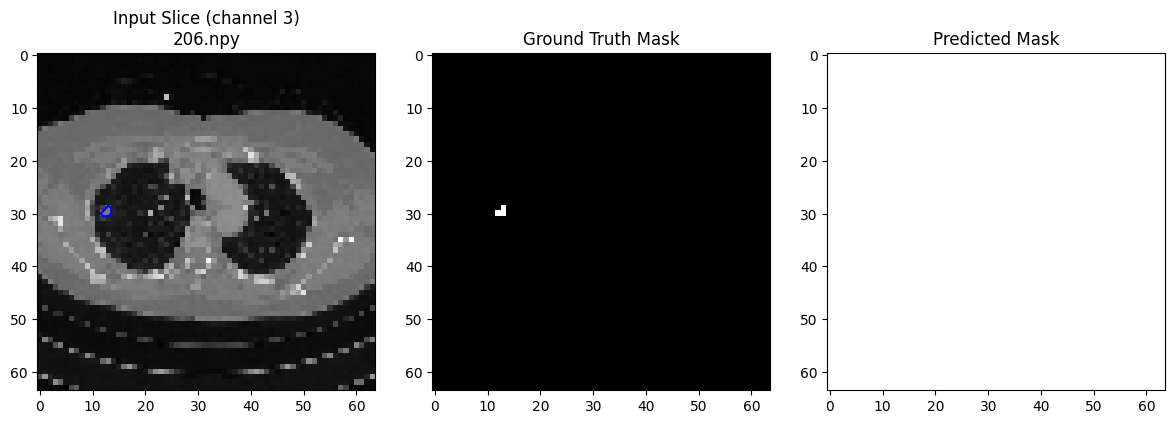

In [6]:
img_dir = "resized_imgs"
mask_dir = "resized_masks"

dataset = LungStackedDataset(img_dir, mask_dir)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

device = torch.device("cuda")
model = UNetWrapper(in_channels=7, n_classes=1, wf=4, depth=3, batch_norm=True)

checkpoint_path = "finetuned_all_patients.state"
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model_state"], strict=True)
model.to(device)
model.eval()

with torch.no_grad():
    for i, (img, mask, fname) in enumerate(loader):
        img = img.to(device)
        mask = mask.to(device)

        output = model(img)
        pred = torch.sigmoid(output).squeeze().cpu().numpy()
        pred_bin = (pred > 0.01).astype(np.uint8)

        visualize_prediction(img, mask, pred_bin, fname[0], channel=3)

        if i == 5:
            break

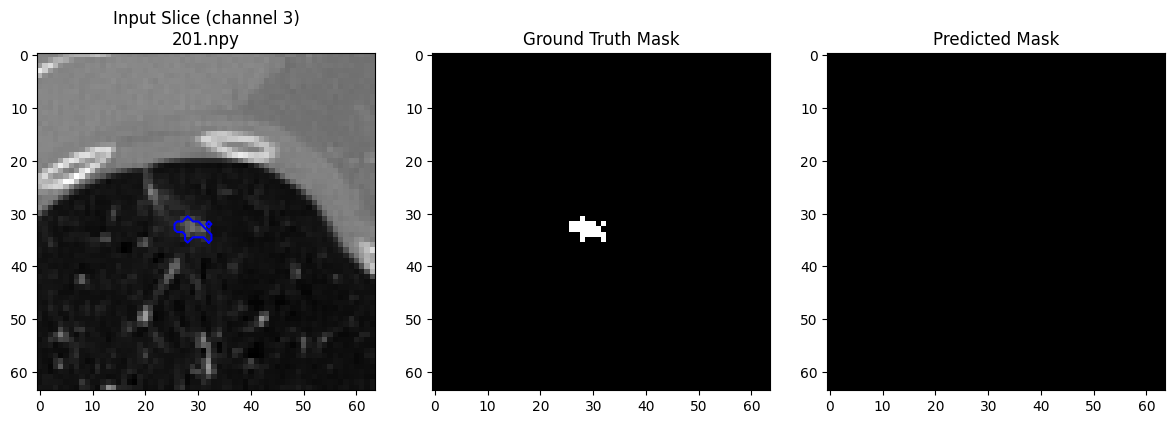

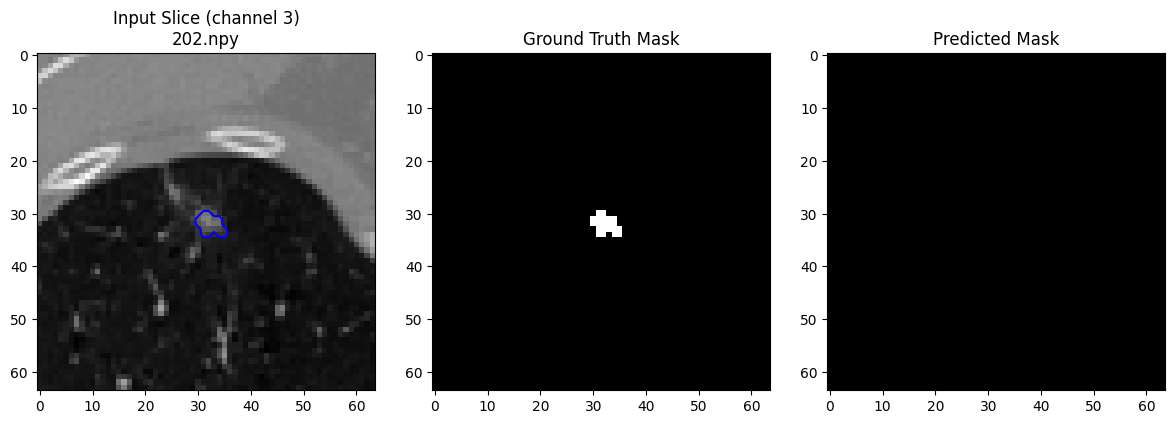

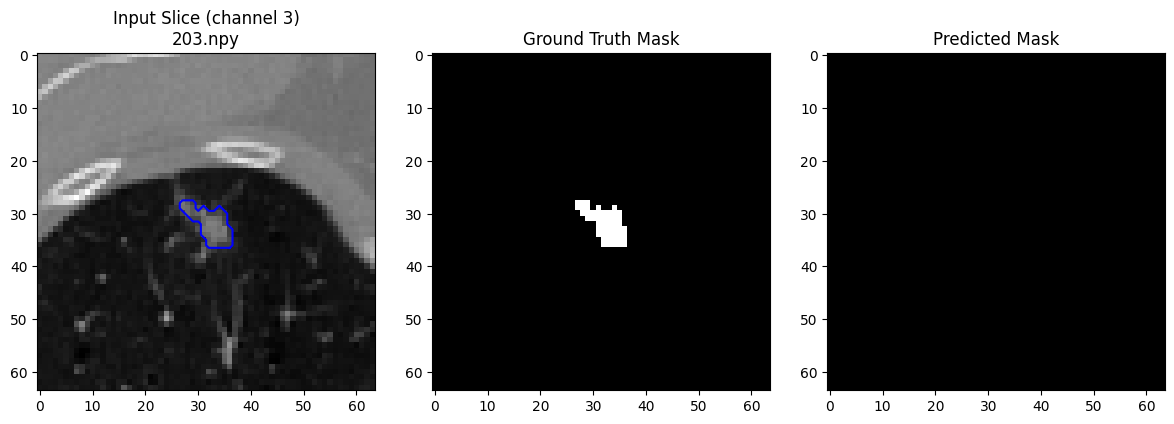

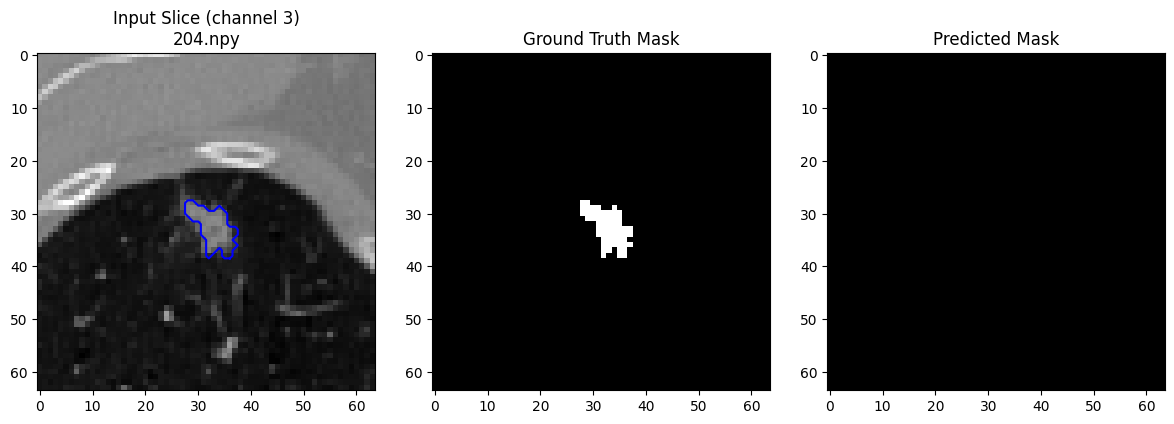

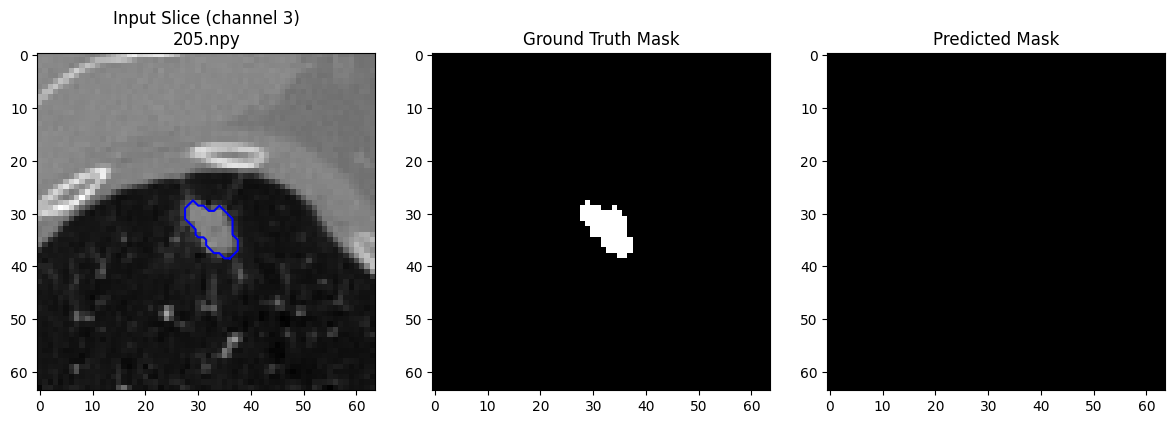

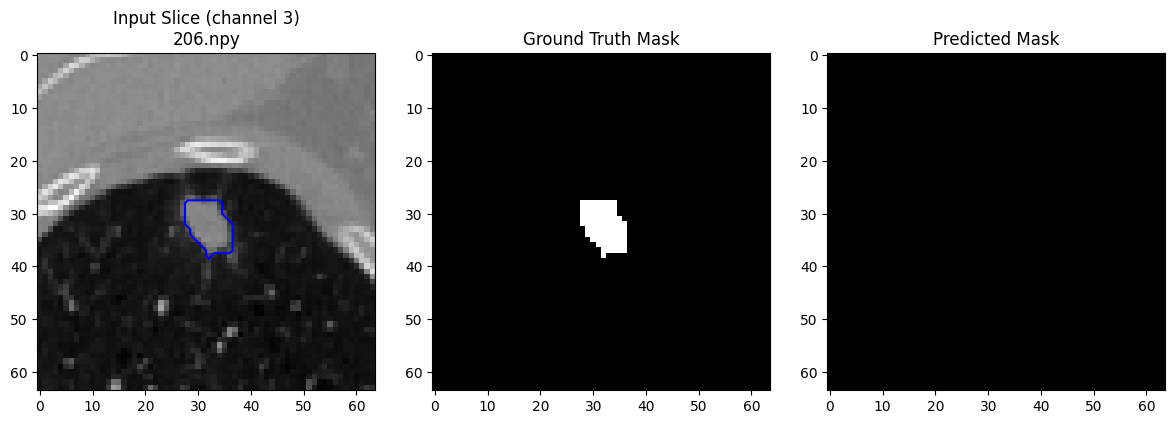

In [10]:
img_dir = "cropped_imgs"
mask_dir = "cropped_masks"

dataset = LungStackedDataset(img_dir, mask_dir)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

device = torch.device("cuda")
model = UNetWrapper(in_channels=7, n_classes=1, wf=4, depth=3, batch_norm=True)

checkpoint_path = "finetuned_all_patients.state"
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model_state"], strict=True)
model.to(device)
model.eval()

with torch.no_grad():
    for i, (img, mask, fname) in enumerate(loader):
        img = img.to(device)
        mask = mask.to(device)

        output = model(img)
        pred = torch.sigmoid(output).squeeze().cpu().numpy()
        pred_bin = (pred > 0.2).astype(np.uint8)

        visualize_prediction(img, mask, pred_bin, fname[0], channel=3)

        if i == 5:
            break

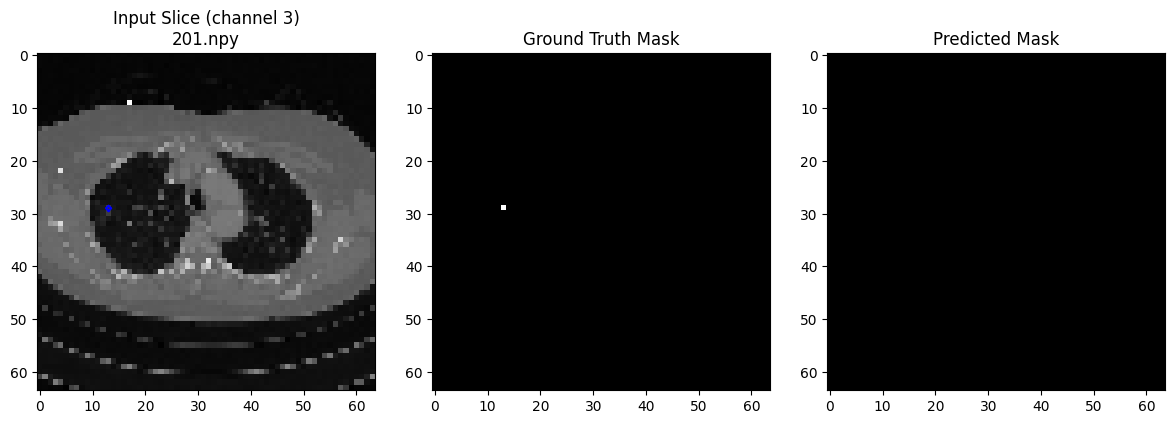

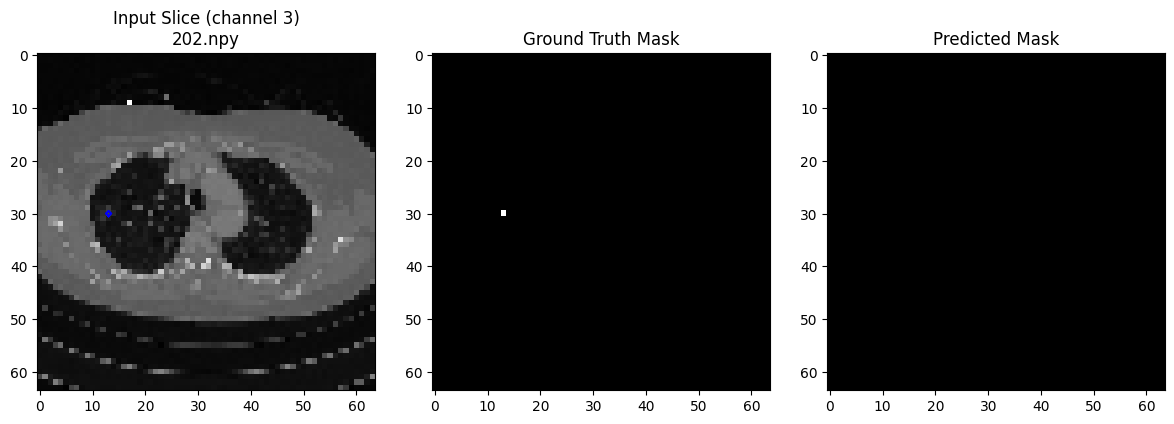

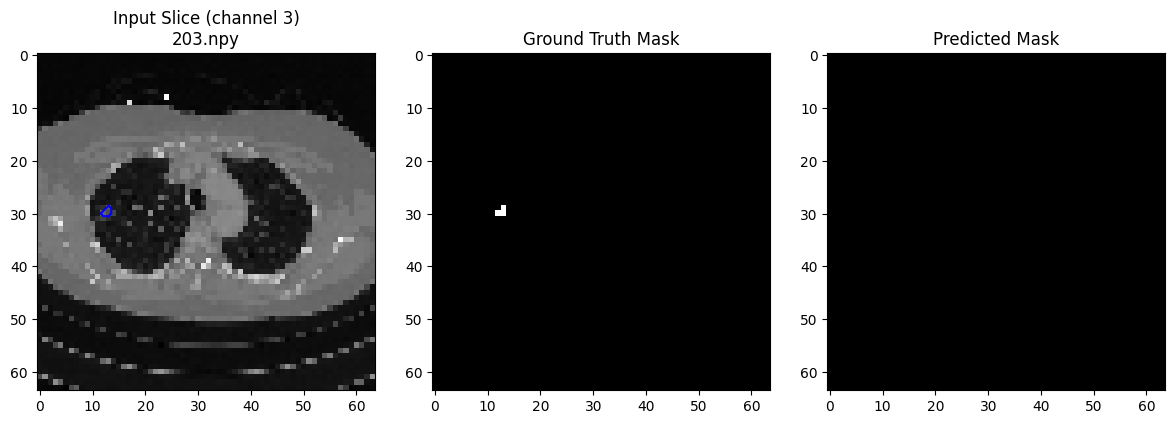

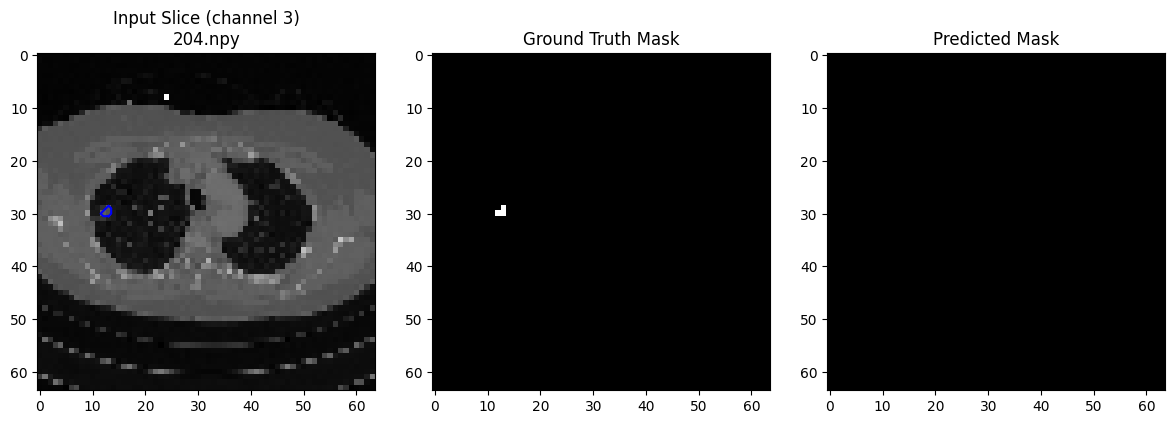

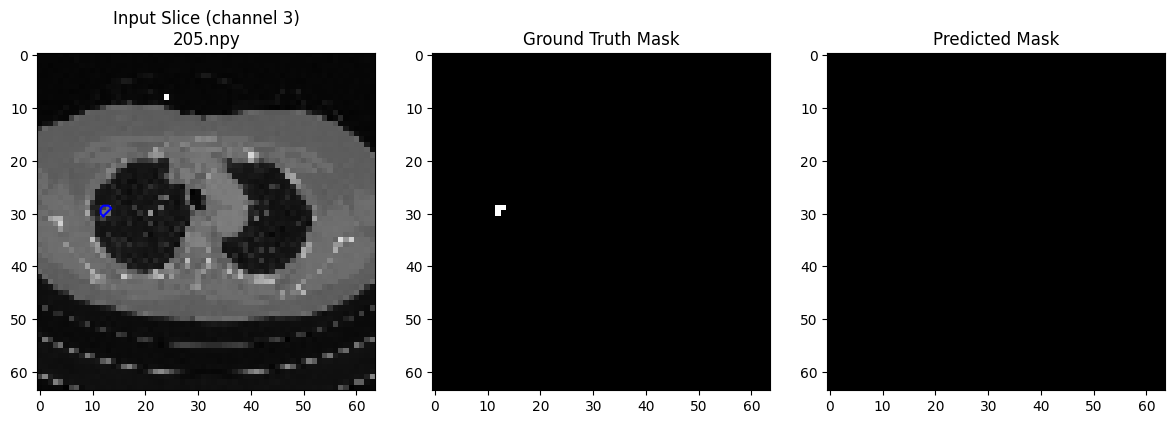

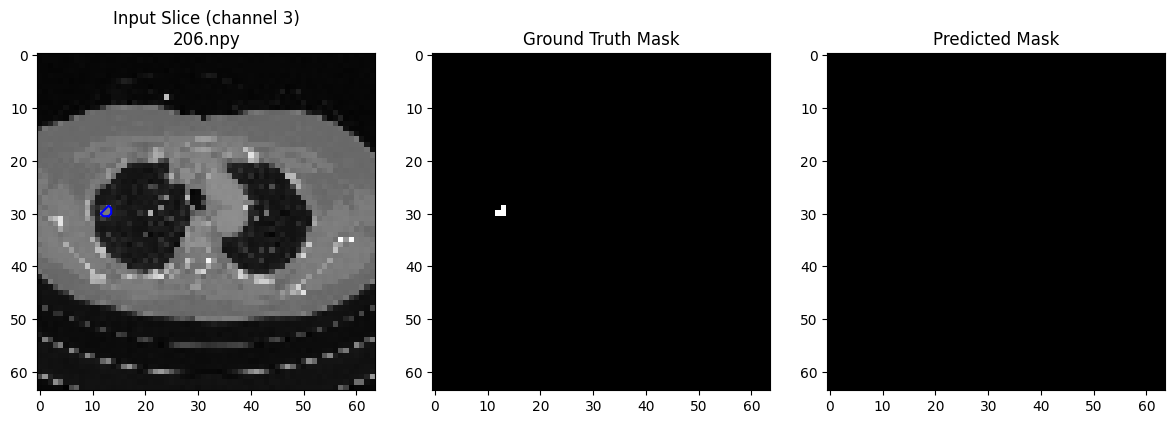

In [10]:
img_dir = "resized_imgs"
mask_dir = "resized_masks"

dataset = LungStackedDataset(img_dir, mask_dir)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

device = torch.device("cuda")
model = UNetWrapper(in_channels=7, n_classes=1, wf=4, depth=3, batch_norm=True)

checkpoint_path = "seg_model3.state"
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint["model_state"], strict=True)
model.to(device)
model.eval()

with torch.no_grad():
    for i, (img, mask, fname) in enumerate(loader):
        img = img.to(device)
        mask = mask.to(device)

        output = model(img)
        pred = torch.sigmoid(output).squeeze().cpu().numpy()
        pred_bin = (pred > 0.2).astype(np.uint8)

        visualize_prediction(img, mask, pred_bin, fname[0], channel=3)

        if i == 5:
            break